In [1]:
import os
import random
import string
import math
import matplotlib
import numpy as np

import seaborn as sns
# %matplotlib notebook
import matplotlib.pylab as plt
from tqdm.notebook import tqdm

In [2]:
# Table of Position of 64 bits at initial level: Initial Permutation Table
initial_perm = [58, 50, 42, 34, 26, 18, 10, 2,
                60, 52, 44, 36, 28, 20, 12, 4,
                62, 54, 46, 38, 30, 22, 14, 6,
                64, 56, 48, 40, 32, 24, 16, 8,
                57, 49, 41, 33, 25, 17, 9, 1,
                59, 51, 43, 35, 27, 19, 11, 3,
                61, 53, 45, 37, 29, 21, 13, 5,
                63, 55, 47, 39, 31, 23, 15, 7]

# Expansion D-box Table
exp_d = [32, 1 , 2 , 3 , 4 , 5 , 4 , 5,
        6 , 7 , 8 , 9 , 8 , 9 , 10, 11,
        12, 13, 12, 13, 14, 15, 16, 17,
        16, 17, 18, 19, 20, 21, 20, 21,
        22, 23, 24, 25, 24, 25, 26, 27,
        28, 29, 28, 29, 30, 31, 32, 1 ]

# S-boxes
# S-box Table
sbox = [[[14, 4, 13, 1, 2, 15, 11, 8, 3, 10, 6, 12, 5, 9, 0, 7],
        [ 0, 15, 7, 4, 14, 2, 13, 1, 10, 6, 12, 11, 9, 5, 3, 8],
        [ 4, 1, 14, 8, 13, 6, 2, 11, 15, 12, 9, 7, 3, 10, 5, 0],
        [15, 12, 8, 2, 4, 9, 1, 7, 5, 11, 3, 14, 10, 0, 6, 13 ]],
            
        [[15, 1, 8, 14, 6, 11, 3, 4, 9, 7, 2, 13, 12, 0, 5, 10],
            [3, 13, 4, 7, 15, 2, 8, 14, 12, 0, 1, 10, 6, 9, 11, 5],
            [0, 14, 7, 11, 10, 4, 13, 1, 5, 8, 12, 6, 9, 3, 2, 15],
        [13, 8, 10, 1, 3, 15, 4, 2, 11, 6, 7, 12, 0, 5, 14, 9 ]],

        [ [10, 0, 9, 14, 6, 3, 15, 5, 1, 13, 12, 7, 11, 4, 2, 8],
        [13, 7, 0, 9, 3, 4, 6, 10, 2, 8, 5, 14, 12, 11, 15, 1],
        [13, 6, 4, 9, 8, 15, 3, 0, 11, 1, 2, 12, 5, 10, 14, 7],
            [1, 10, 13, 0, 6, 9, 8, 7, 4, 15, 14, 3, 11, 5, 2, 12 ]],
    
        [ [7, 13, 14, 3, 0, 6, 9, 10, 1, 2, 8, 5, 11, 12, 4, 15],
        [13, 8, 11, 5, 6, 15, 0, 3, 4, 7, 2, 12, 1, 10, 14, 9],
        [10, 6, 9, 0, 12, 11, 7, 13, 15, 1, 3, 14, 5, 2, 8, 4],
            [3, 15, 0, 6, 10, 1, 13, 8, 9, 4, 5, 11, 12, 7, 2, 14] ],
        
        [ [2, 12, 4, 1, 7, 10, 11, 6, 8, 5, 3, 15, 13, 0, 14, 9],
        [14, 11, 2, 12, 4, 7, 13, 1, 5, 0, 15, 10, 3, 9, 8, 6],
            [4, 2, 1, 11, 10, 13, 7, 8, 15, 9, 12, 5, 6, 3, 0, 14],
        [11, 8, 12, 7, 1, 14, 2, 13, 6, 15, 0, 9, 10, 4, 5, 3 ]],
    
        [ [12, 1, 10, 15, 9, 2, 6, 8, 0, 13, 3, 4, 14, 7, 5, 11],
        [10, 15, 4, 2, 7, 12, 9, 5, 6, 1, 13, 14, 0, 11, 3, 8],
            [9, 14, 15, 5, 2, 8, 12, 3, 7, 0, 4, 10, 1, 13, 11, 6],
            [4, 3, 2, 12, 9, 5, 15, 10, 11, 14, 1, 7, 6, 0, 8, 13] ],
        
        [ [4, 11, 2, 14, 15, 0, 8, 13, 3, 12, 9, 7, 5, 10, 6, 1],
        [13, 0, 11, 7, 4, 9, 1, 10, 14, 3, 5, 12, 2, 15, 8, 6],
            [1, 4, 11, 13, 12, 3, 7, 14, 10, 15, 6, 8, 0, 5, 9, 2],
            [6, 11, 13, 8, 1, 4, 10, 7, 9, 5, 0, 15, 14, 2, 3, 12] ],
        
        [ [13, 2, 8, 4, 6, 15, 11, 1, 10, 9, 3, 14, 5, 0, 12, 7],
            [1, 15, 13, 8, 10, 3, 7, 4, 12, 5, 6, 11, 0, 14, 9, 2],
            [7, 11, 4, 1, 9, 12, 14, 2, 0, 6, 10, 13, 15, 3, 5, 8],
            [2, 1, 14, 7, 4, 10, 8, 13, 15, 12, 9, 0, 3, 5, 6, 11] ] ]


# Expansion D-box Table
exp_d = [32, 1 , 2 , 3 , 4 , 5 , 4 , 5,
        6 , 7 , 8 , 9 , 8 , 9 , 10, 11,
        12, 13, 12, 13, 14, 15, 16, 17,
        16, 17, 18, 19, 20, 21, 20, 21,
        22, 23, 24, 25, 24, 25, 26, 27,
        28, 29, 28, 29, 30, 31, 32, 1 ]

# Permute function to rearrange the bits
def permute(k, arr, n):
    permutation = ""
    for i in range(0, n):
        permutation = permutation + k[arr[i] - 1]
    return permutation




In [3]:
File_data = np.loadtxt(r'C:\Users\Zamani\cipher_text.txt', dtype=str)
np.shape(File_data)

(1000, 2)

In [4]:
# Split the data up into respectable sections
pt = File_data[:,0]
ct = File_data[:,1]

In [5]:
ct[0:4]

array(['B73012C9B7AE29EB', '8BB5666EE221202A', '52A38620A5E48E73',
       '5A3CAEC1AC6A0885'], dtype='<U16')

In [6]:
Trace = np.load(r'C:\Users\Zamani\powertraces.npy')
Trace

array([[8.27513237, 1.51240741, 5.51901764, ..., 5.98387854, 5.05528143,
        3.48348688],
       [1.2208228 , 3.31374485, 4.09803656, ..., 6.02548613, 2.69483242,
        3.9368142 ],
       [4.76490631, 0.26510265, 0.91898289, ..., 5.17467495, 0.41862371,
        5.07871108],
       ...,
       [5.49895888, 7.85418415, 2.96875921, ..., 5.25151006, 5.10418113,
        2.74822266],
       [2.36183532, 2.60764555, 1.70050523, ..., 6.07008649, 2.83599683,
        2.25697489],
       [4.75765686, 3.12529401, 5.78089708, ..., 4.49825604, 5.03239071,
        4.01045461]])

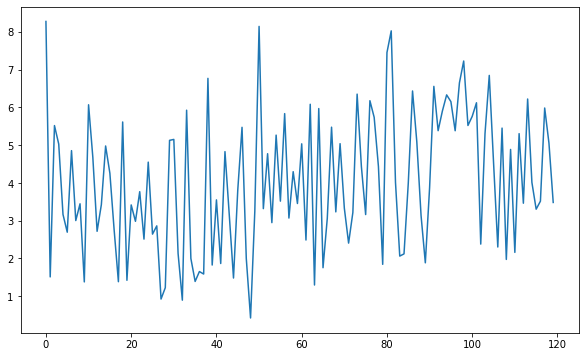

In [7]:
plt.figure(figsize=(10,6))
plt.plot(Trace[0])
plt.show()

In [8]:
def hex2bin(s):
    mp = {'0' : "0000",
        '1' : "0001",
        '2' : "0010",
        '3' : "0011",
        '4' : "0100",
        '5' : "0101",
        '6' : "0110",
        '7' : "0111",
        '8' : "1000",
        '9' : "1001",
        'A' : "1010",
        'B' : "1011",
        'C' : "1100",
        'D' : "1101",
        'E' : "1110",
        'F' : "1111" }
    bin = ""
    for i in range(len(s)):
        bin = bin + mp[s[i]]
    return bin

def dec2bin(num):
    res = bin(num).replace("0b", "")
    if(len(res)%4 != 0):
        div = len(res) / 4
        div = int(div)
        counter =(4 * (div + 1)) - len(res)
        for i in range(0, counter):
            res = '0' + res
    return res

def bin2hex(s):
    mp = {"0000" : '0',
        "0001" : '1',
        "0010" : '2',
        "0011" : '3',
        "0100" : '4',
        "0101" : '5',
        "0110" : '6',
        "0111" : '7',
        "1000" : '8',
        "1001" : '9',
        "1010" : 'A',
        "1011" : 'B',
        "1100" : 'C',
        "1101" : 'D',
        "1110" : 'E',
        "1111" : 'F' }
    hex = ""
    for i in range(0,len(s),4):
        ch = ""
        ch = ch + s[i]
        ch = ch + s[i + 1]
        ch = ch + s[i + 2]
        ch = ch + s[i + 3]
        hex = hex + mp[ch]
        
    return hex

hex2bin("170E260D03191534")

'0001011100001110001001100000110100000011000110010001010100110100'

In [9]:
def Attack_model(pt,bytenum): # can be plaintext or ciphertext
        # Initial Permutation
        pt = permute(pt, initial_perm, 64)
        #print("After initial permutation", bin2hex(pt))

        # Splitting
        left = pt[0:32]
        right = pt[32:64]
        # Expansion on R
        # Expansion D-box: Expanding the 32 bits data into 48 bits
        right_expanded = permute(right, exp_d, 48)  
#         print(right_expanded,'\n')
#       b = 0
        if (bytenum == 1):
            b = int(right_expanded,2) >> (48-6*bytenum)
            b = format(b,'06b')
        elif(bytenum == 2):
            b = int(f"{int(right_expanded,2) & 0b000000111111000000000000000000000000000000000000:06b}",2)>>(48-6*bytenum)
            b = format(b,"06b")
        elif(bytenum == 3):
            b = int(f"{int(right_expanded,2) & 0b000000000000111111000000000000000000000000000000:06b}",2)>>(48-6*bytenum)
            b = format(b,"06b")            
        elif(bytenum == 4):
            b = int(f"{int(right_expanded,2) & 0b000000000000000000111111000000000000000000000000:06b}",2)>>(48-6*bytenum)
            b = format(b,"06b")         
        elif(bytenum == 5):
            b = int(f"{int(right_expanded,2) & 0b000000000000000000000000111111000000000000000000:06b}",2)>>(48-6*bytenum)
            b = format(b,"06b")   
        elif(bytenum == 6):
            b = int(f"{int(right_expanded,2) & 0b000000000000000000000000000000111111000000000000:06b}",2)>>(48-6*bytenum)
            b = format(b,"06b")              
        elif(bytenum == 7):
            b = int(f"{int(right_expanded,2) & 0b000000000000000000000000000000000000111111000000:06b}",2)>>(48-6*bytenum)
            b = format(b,"06b")              
        elif(bytenum == 8):
            b = int(f"{int(right_expanded,2) & 0b000000000000000000000000000000000000000000111111:06b}",2)>>(48-6*bytenum)
            b = format(b,"06b")               
        else:
            print("byte %d out of bound"%bytenum)
            
        return int(b,2)

In [10]:
Attack_model(hex2bin(ct[0]),1)

55

In [11]:
def selection_func(pt,keyguess):
    return pt ^ keyguess

In [12]:
# Plotting Differences

def calculate_diffs(pt,Trace, byteindex=0, guess=0):
       
    one_list = []
    zero_list = []
    Sbox = np.reshape(sbox[byteindex], -1)
    for trace_index in (range(1000)):
        SboxOut = Sbox[selection_func(Attack_model(hex2bin(pt[trace_index]),byteindex+1),guess)]
        if ((SboxOut) & 0x1):
            one_list.append(Trace[trace_index])
        else:
            zero_list.append(Trace[trace_index])
    one_avg = np.asarray(one_list).mean(axis=0)
#     if(not np.isnan(one_avg).any()): 
# #         print(one_avg)
#         print("guess: ",guess)    
    zero_avg = np.asarray(zero_list).mean(axis=0)
    return abs(one_avg - zero_avg)

In [13]:
# For byte = 0 we take all key guesses [0,63]
# you can also do this for all bytes if you create another loop and change the size of z to be MxN
# M is the number of samples, N is the number of guesses
z = []
for Byte in tqdm(range(8)):
    Solve = []
    for i in (range(64)):
        Solve.append(calculate_diffs(ct,Trace, Byte,i))
    z.append(Solve)
z

  0%|          | 0/8 [00:00<?, ?it/s]

[[array([0.03637066, 0.02446708, 0.1088043 , 0.19380072, 0.07250543,
         0.05784556, 0.01665496, 0.15427039, 0.00234837, 0.03365672,
         0.05071875, 0.03435956, 0.1029901 , 0.11114922, 0.01764427,
         0.10703305, 0.02110997, 0.01982425, 0.07163839, 0.00422168,
         0.17251332, 0.14757344, 0.14557364, 0.00271174, 0.12905208,
         0.03368819, 0.12981292, 0.13612401, 0.04153279, 0.04284499,
         0.21944366, 0.16758412, 0.04070471, 0.12671632, 0.09067981,
         0.16920175, 0.09083838, 0.09083957, 0.11418912, 0.32986523,
         0.01780236, 0.04395357, 0.14149312, 0.17466176, 0.14758346,
         0.17301379, 0.10368829, 0.04079376, 0.21140345, 0.31793267,
         0.11394398, 0.07751496, 0.0428699 , 0.21214393, 0.04220828,
         0.0288085 , 0.11965619, 0.04601985, 0.05422071, 0.15749459,
         0.07530841, 0.04594722, 0.12892164, 0.05212459, 0.04865529,
         0.08375151, 0.06997733, 0.05580948, 0.18475356, 0.09954161,
         0.03476915, 0.01628541, 0

In [14]:
np.shape(z)

(8, 64, 120)

In [15]:
# Example taking the max of guess = 0
ranked_guesses = np.empty((64,8))
maxcors = np.empty((64,8),dtype='float64')
for byte in range(8):
    Mx = np.empty((64))
    for guess in range(64):
        Mx[guess] = np.max(z[byte][guess][:])
    maxcors[:,byte] = Mx
    ranked_guesses[:,byte] = (sorted(range(64), key=lambda k: Mx[k], reverse=True))
maxcors.shape

(64, 8)

In [16]:
maxcors

array([[0.32986523, 0.36261479, 0.36231252, 0.28391862, 0.37300596,
        0.35177458, 0.43704721, 0.30002383],
       [0.31115   , 0.23430061, 0.31812768, 0.29543238, 0.29501411,
        0.3294045 , 0.31177041, 0.30064752],
       [0.2699706 , 0.29704974, 0.33874428, 0.28611266, 0.3217541 ,
        0.29119778, 0.32368817, 0.38900839],
       [0.27195162, 0.29660148, 0.25879389, 0.29601266, 0.26854001,
        0.41017421, 0.43357148, 0.36367476],
       [0.25303171, 0.21358328, 0.31955955, 0.25588906, 0.43930667,
        0.26226132, 0.35647986, 0.26804827],
       [0.41525114, 0.28992063, 0.27657785, 0.35630722, 0.28037489,
        0.29479029, 0.3288014 , 0.33353978],
       [0.26025304, 0.29152965, 0.35848524, 0.38415357, 0.32150384,
        0.26196293, 0.25552141, 0.36492352],
       [0.31775792, 0.24086873, 0.38003489, 0.30625732, 0.39249267,
        0.32013891, 0.30408156, 0.33979889],
       [0.29653723, 0.32411389, 0.23335557, 0.27325534, 0.34496669,
        0.37703858, 0.310502

<IPython.core.display.Javascript object>


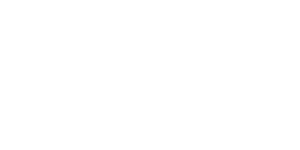

<IPython.core.display.Javascript object>


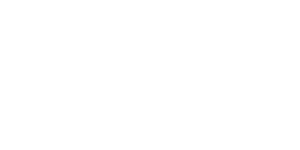

<IPython.core.display.Javascript object>


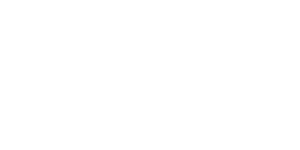

<IPython.core.display.Javascript object>


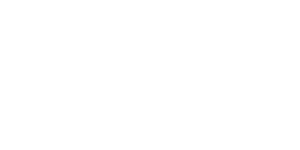

<IPython.core.display.Javascript object>


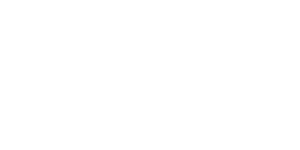

<IPython.core.display.Javascript object>


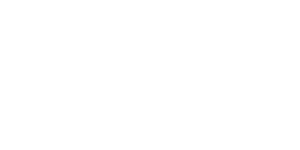

<IPython.core.display.Javascript object>


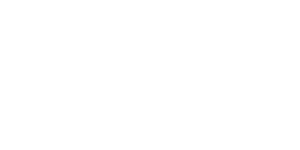

<IPython.core.display.Javascript object>


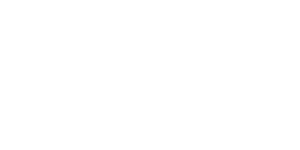

In [17]:
%matplotlib notebook
matplotlib.rcParams.update({'font.size': 12})
sns.set_style("white")
sns.set_palette(sns.color_palette("Set2"))

for B in range(8):
    plt.figure(figsize=(10,6))
    plt.scatter(np.linspace(0,63,64),maxcors[:,B])
    plt.scatter(np.argmax(maxcors[:,B]),np.max(maxcors[:,B]))
    label = '%d, %.2e' % (np.argmax(maxcors[:,B]),np.max(maxcors[:,B])) #"{:n,:.2f}".format(np.argmax(Mx),np.max(Mx))
    plt.annotate(label, # this is the text
                 (np.argmax(maxcors[:,B]),np.max(maxcors[:,B])), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-15), # distance from text to points (x,y)
                 ha='center',
                 va='bottom') # horizontal alignment can be left, right or center
    plt.title("Difference of means for S%d"%(B+1))
    plt.xlabel("Guesses")
    plt.ylabel("Difference of Means")

In [18]:
#print(int[hex(ranked_guesses[i]) for i in range(5)])

In [19]:
int(ranked_guesses[0][0])

30

<IPython.core.display.Javascript object>


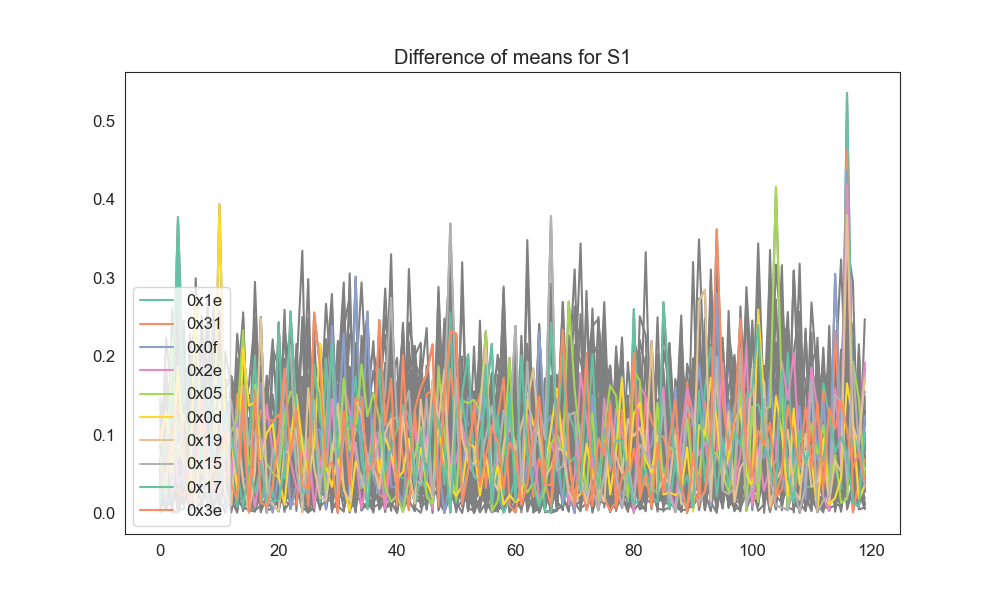

<IPython.core.display.Javascript object>


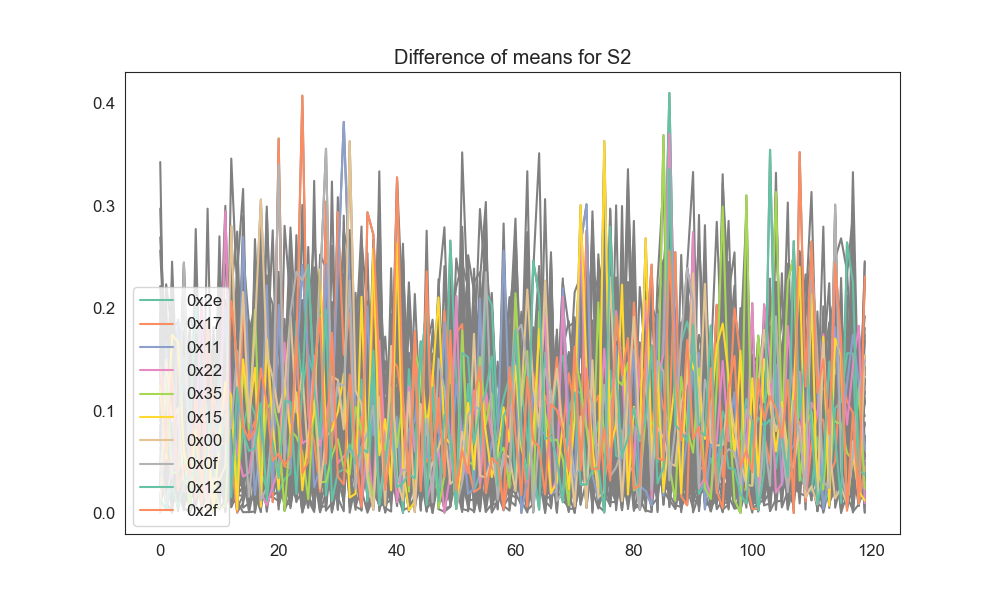

<IPython.core.display.Javascript object>


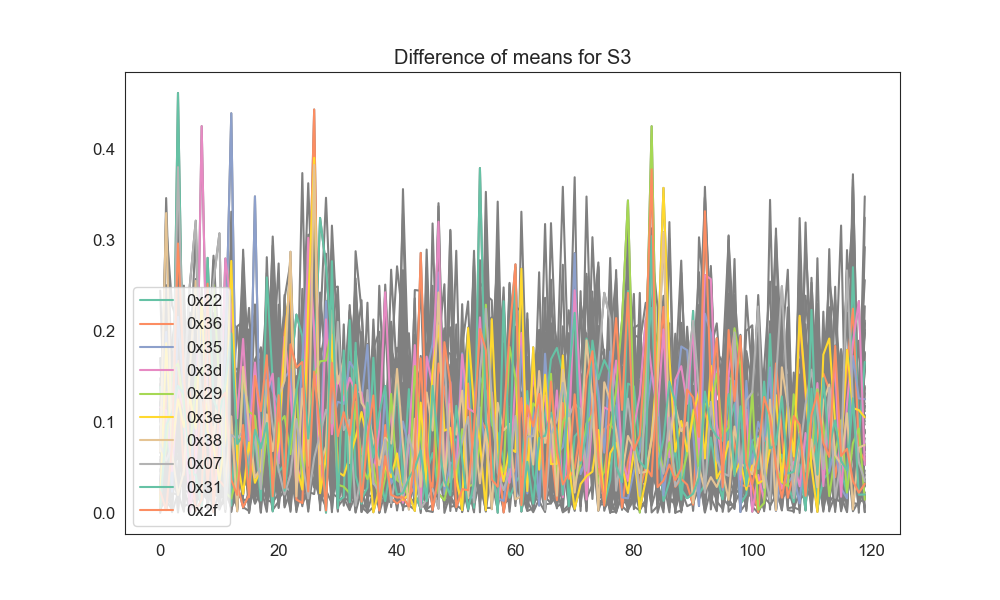

<IPython.core.display.Javascript object>


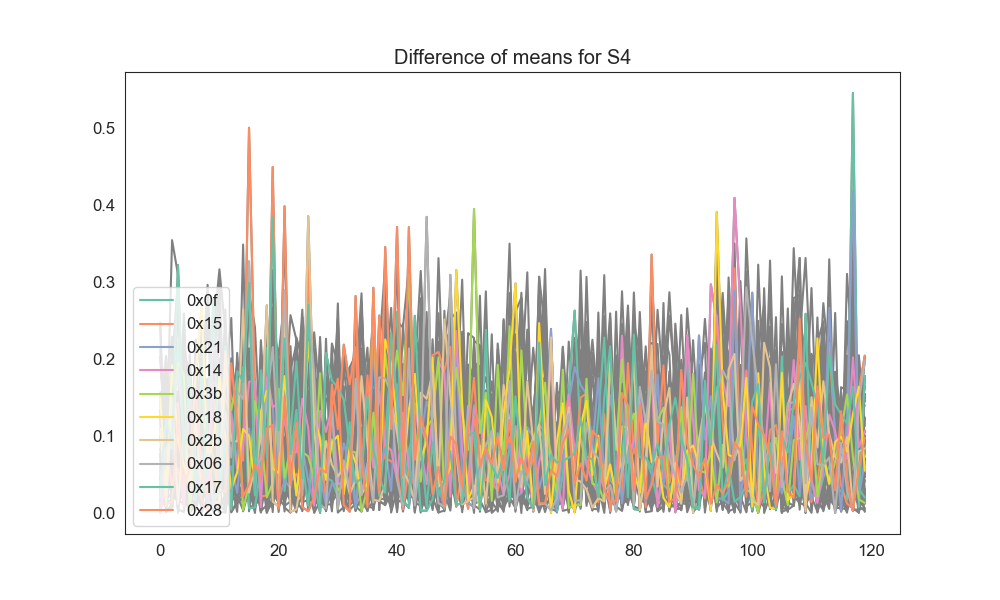

<IPython.core.display.Javascript object>


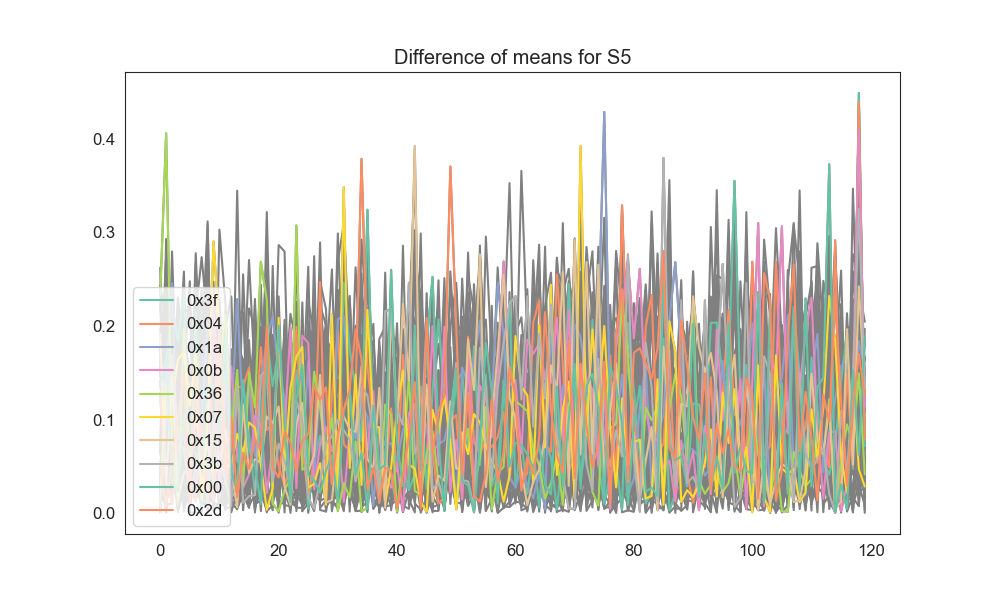

<IPython.core.display.Javascript object>


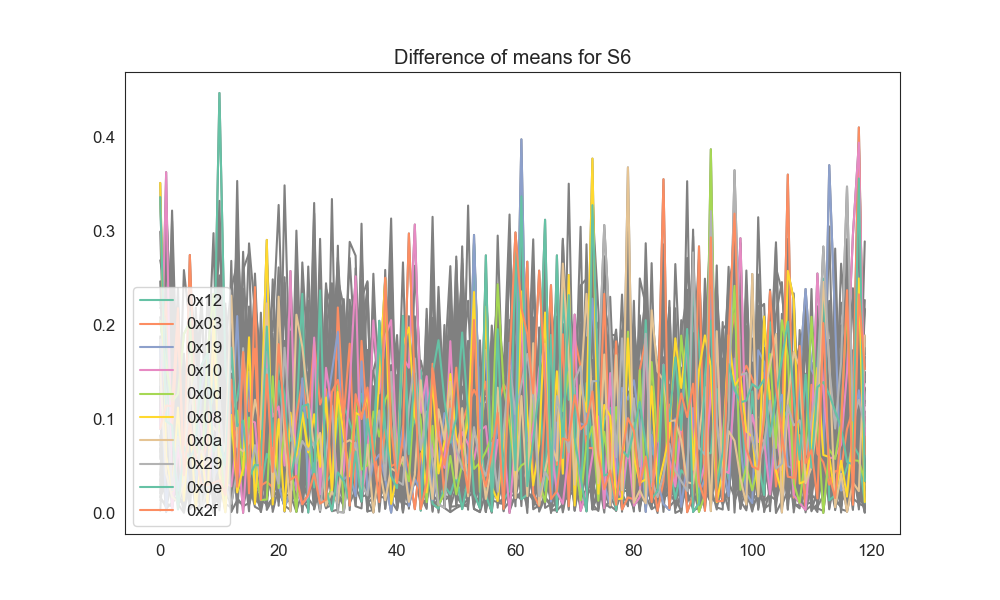

<IPython.core.display.Javascript object>


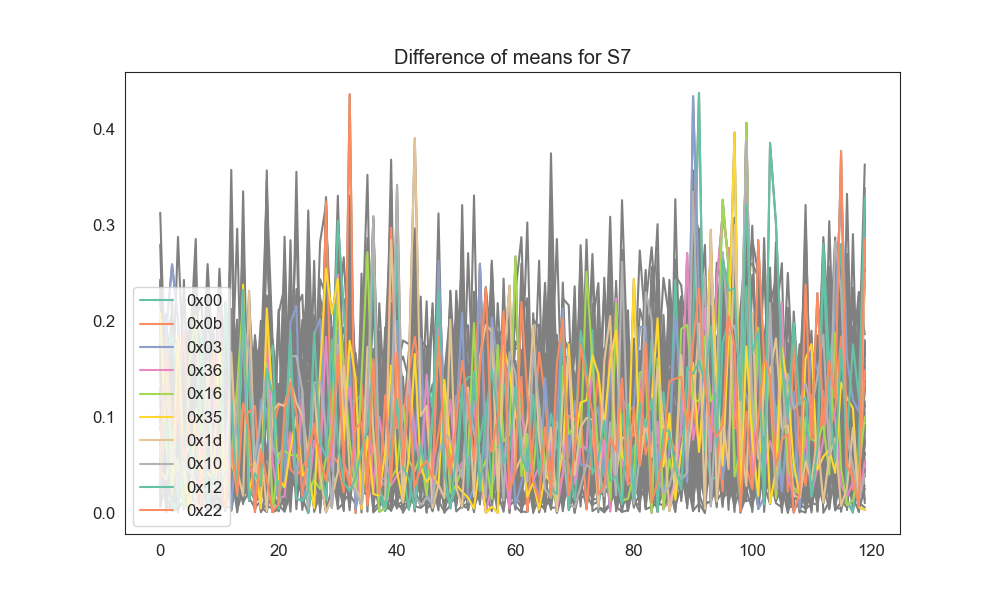

<IPython.core.display.Javascript object>


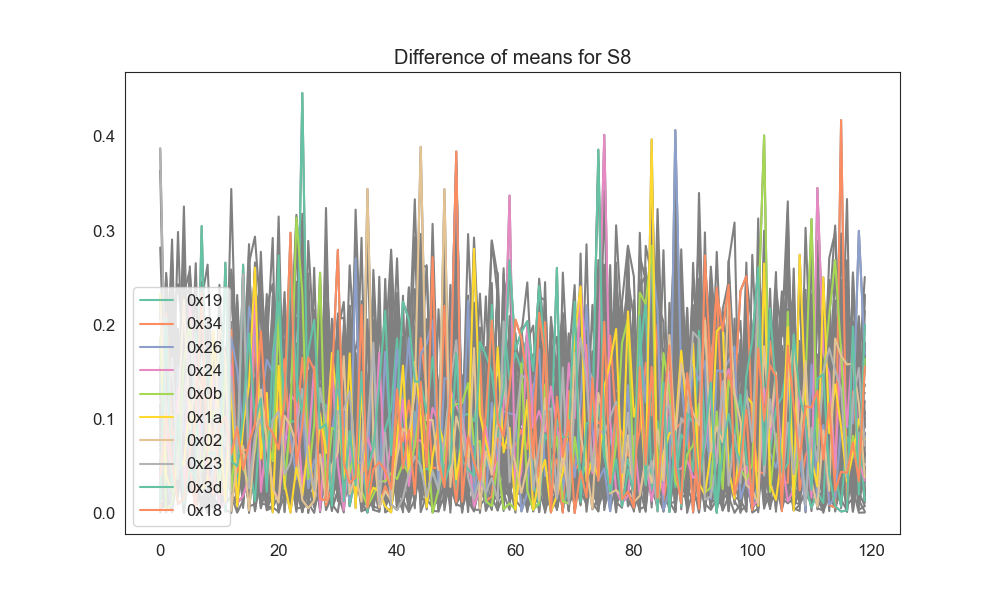

In [20]:
%matplotlib notebook
matplotlib.rcParams.update({'font.size': 12})
sns.set_style("white")
sns.set_palette(sns.color_palette("Set2"))
for B in range(8):
    plt.figure(figsize=(10,6))
    for guess in ranked_guesses[:,B]:
#         print(guess)
        plt.plot(z[B][int(guess)],color="grey")
    for g in ranked_guesses[:10,B]:
#         print (hex(int(g)), maxcors[int(g)])
        plt.plot(z[B][int(g)],label="0x%02x"%int(g))
    plt.title("Difference of means for S%d"%(B+1))
    plt.legend(loc='lower left')

In [21]:
int(ranked_guesses[0][0])

30

<IPython.core.display.Javascript object>


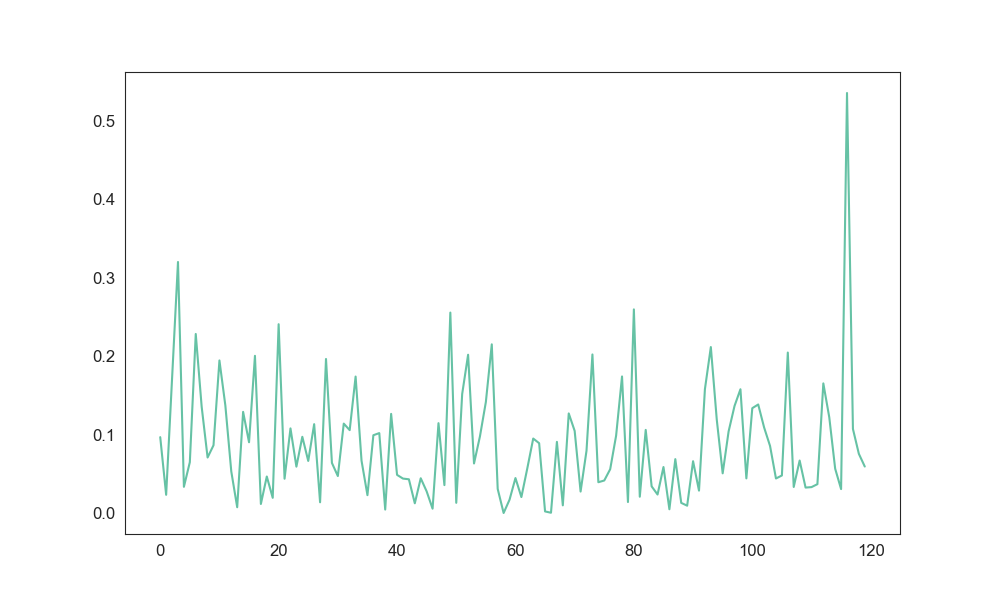

In [22]:
plt.figure(figsize=(10,6))
plt.plot(z[0][int(ranked_guesses[0,0])])

In [23]:
def calculate_diffs(pt,Trace,t, byteindex=0):
       
    one_list = []
    zero_list = []
    Sbox = np.reshape(sbox[byteindex], -1)
    maxcors = np.empty((64))
    for g in range(64): 
        for trace_index in range(t):
            SboxOut = Sbox[selection_func(Attack_model(hex2bin(pt[trace_index]),byteindex+1),g)]
            if ((SboxOut) & 0x1):
                one_list.append(Trace[trace_index])
            else:
                zero_list.append(Trace[trace_index])
        one_avg = np.asarray(one_list).mean(axis=0)   
        zero_avg = np.asarray(zero_list).mean(axis=0)
        maxcors[g] = np.max(abs(one_avg - zero_avg))
    return maxcors

In [24]:
def MTDS(correctKey,maxcors):

  maxcors[np.isnan(maxcors)] = 0
  CorrectKeyT = maxcors[correctKey,:]
  failkeyT = maxcors[np.arange(len(maxcors))!=correctKey]

  matplotlib.rcParams.update({'font.size': 12})
  sns.set_style("white")
  sns.set_palette(sns.color_palette("Set2"))
  plt.figure(figsize=(10,6))
  for k in range(len(failkeyT)):
      if(k==1):
        plt.plot(failkeyT[k,10:maxcors.shape[1]],color="grey",label="wrong key")
      else:
        plt.plot(failkeyT[k,10:maxcors.shape[1]],color="grey")      

  plt.plot(CorrectKeyT[10:maxcors.shape[1]],color="red",label="correct key")

 
  # plt.xlim([0,maxcors.shape[1]])
  plt.ylim([0,1])
  plt.xlabel("Number of Traces",fontsize=15)
  plt.ylabel("Max difference",fontsize=15)
  plt.legend()
  sns.despine(offset=10)

  # return ranked_guesses,maxcors


In [25]:
Maxcors = np.empty((64,Trace.shape[0]))
for t in tqdm(range(1000)):
    Maxcors[:,t] = (calculate_diffs(ct,Trace,t, 0))

  0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\Zamani\AppData\Local\Temp/ipykernel_11808/2065855348.py:14: RuntimeWarning: Mean of empty slice.
  one_avg = np.asarray(one_list).mean(axis=0)
C:\Users\Zamani\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Zamani\AppData\Local\Temp/ipykernel_11808/2065855348.py:15: RuntimeWarning: Mean of empty slice.
  zero_avg = np.asarray(zero_list).mean(axis=0)


<IPython.core.display.Javascript object>


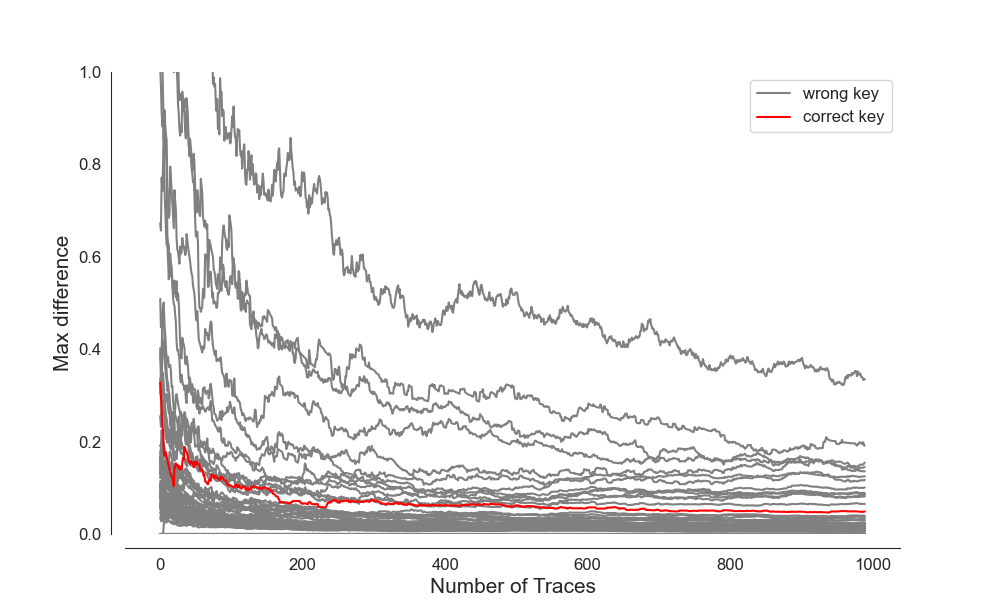

In [35]:
correctkey = 0x0D
MTDS(correctkey,Maxcors)